In [21]:
import pandas as pd
import numpy as np
import string

In [22]:
df = pd.read_csv(r'../data/GTZAN/lyrics_dataframe.csv')
df

,filename,artist,title,genre,lyrics,instrumental
0,blues.00000.wav,John Lee Hooker,"One Bourbon, One Scotch And One Beer",blues,"One bourbon, one scotch and one beer\nOne bour...",False
1,blues.00001.wav,John Lee Hooker,I'm In The Mood For Love,blues,"I'm in the mood baby, I'm in the mood for love...",False
2,blues.00002.wav,John Lee Hooker,Think Twice Before You Go,blues,"\nThink twice before you go, baby, this will b...",False
3,blues.00003.wav,John Lee Hooker,I'm Bad Like Jesse James,blues,"\n...A little thing I'm going to do called ""I'...",False
4,blues.00004.wav,John Lee Hooker,Walkin’ The Boogie,blues,"Well my mama she didn't 'low me, just to stay ...",False
...,...,...,...,...,...,...
970,rock.00095.wav,The Stone Roses,Bye Bye Bad Man,rock,\nSoak me to my skin\nWill you drown me in you...,False
971,rock.00096.wav,The Stone Roses,(Song For My) Sugar Spun Sister,rock,"\nHer hair, soft drifted snow\nDeath white, I'...",False
972,rock.00097.wav,The Stone Roses,Made Of Stone,rock,\nYour knuckles whiten on the wheel\nThe last ...,False
973,rock.00098.wav,The Stone Roses,Shoot You Down,rock,You know it\nYou show it\nAnd the time has com...,False


In [23]:
print(set(df.genre))

{'disco', 'pop', 'jazz', 'hiphop', 'classical', 'reggae', 'rock', 'blues', 'metal', 'country'}


In [24]:
# value counts of all data samples that have lyrics
df[df.lyrics.notnull()].genre.value_counts()

pop          100
rock         100
disco         99
hiphop        98
country       96
metal         96
reggae        96
blues         78
jazz          18
classical      8
Name: genre, dtype: int64

## Filter datafame

- Remove instrumental songs (that do not have lyrics)
- Decided to remove e.g. the classical genre (only 8 non-instrumental songs)

In [25]:
df = df[df.lyrics.notnull()]
df = df[df.genre != "classical"]
df

,filename,artist,title,genre,lyrics,instrumental
0,blues.00000.wav,John Lee Hooker,"One Bourbon, One Scotch And One Beer",blues,"One bourbon, one scotch and one beer\nOne bour...",False
1,blues.00001.wav,John Lee Hooker,I'm In The Mood For Love,blues,"I'm in the mood baby, I'm in the mood for love...",False
2,blues.00002.wav,John Lee Hooker,Think Twice Before You Go,blues,"\nThink twice before you go, baby, this will b...",False
3,blues.00003.wav,John Lee Hooker,I'm Bad Like Jesse James,blues,"\n...A little thing I'm going to do called ""I'...",False
4,blues.00004.wav,John Lee Hooker,Walkin’ The Boogie,blues,"Well my mama she didn't 'low me, just to stay ...",False
...,...,...,...,...,...,...
970,rock.00095.wav,The Stone Roses,Bye Bye Bad Man,rock,\nSoak me to my skin\nWill you drown me in you...,False
971,rock.00096.wav,The Stone Roses,(Song For My) Sugar Spun Sister,rock,"\nHer hair, soft drifted snow\nDeath white, I'...",False
972,rock.00097.wav,The Stone Roses,Made Of Stone,rock,\nYour knuckles whiten on the wheel\nThe last ...,False
973,rock.00098.wav,The Stone Roses,Shoot You Down,rock,You know it\nYou show it\nAnd the time has com...,False


In [49]:
from operator import index

df.to_csv('../data/GTZAN/filtered_df.csv', index=False)

In [26]:
df.genre.value_counts()

pop        100
rock       100
disco       99
hiphop      98
country     96
metal       96
reggae      96
blues       78
jazz        18
Name: genre, dtype: int64

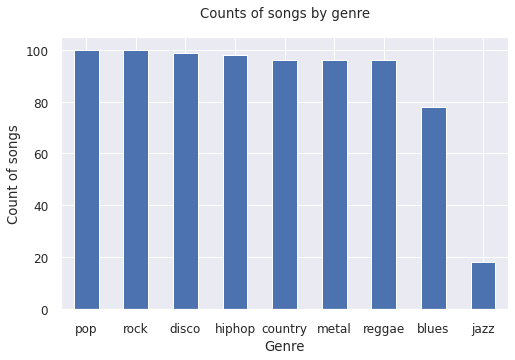

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.1)
df['genre'].value_counts().plot(kind='bar', rot=0, figsize=(8,5))
plt.xlabel("Genre")
plt.ylabel("Count of songs")
plt.title("Counts of songs by genre", y=1.05)
plt.show()

In [35]:
lyrics_lengths = df['lyrics'].str.split().str.len()

print("Minimum lyrics length: " + str(min(lyrics_lengths)) + " words")
print("Maximum lyrics length: " + str(max(lyrics_lengths)) + " words")
print("Average lyrics length: " + str(np.mean(lyrics_lengths)) + " words")
print("Median:                " + str(np.median(lyrics_lengths)) + " words")

Minimum lyrics length: 15 words
Maximum lyrics length: 1111 words
Average lyrics length: 285.56466069142124 words
Median:                241.0 words


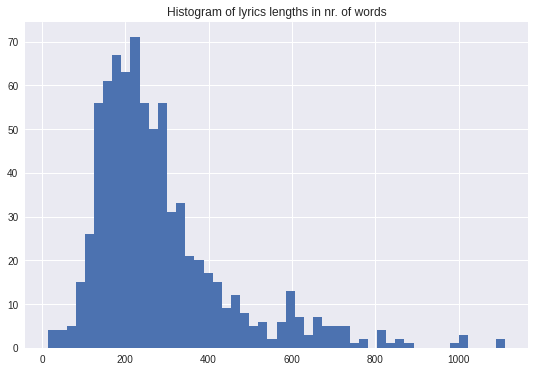

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9,6))
plt.style.use('seaborn')
plt.hist(lyrics_lengths, bins=50)
plt.title("Histogram of lyrics lengths in nr. of words")
plt.show()